# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist 
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

G:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Prepare Dataset

In [2]:
data = pd.read_csv('./data/penguins_size.csv')

data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)

X = data.drop(['species'], axis=1).values
ss = StandardScaler()
X = ss.fit_transform(X) 

y = data['species']
spicies = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
y = [spicies[item] for item in y]
y = np.array(y) 

In [3]:
print(len(X[y == 0][:, 0]))
print(len(X[y == 1][:, 0]))
print(len(X[y == 2][:, 0]))

146
120
68


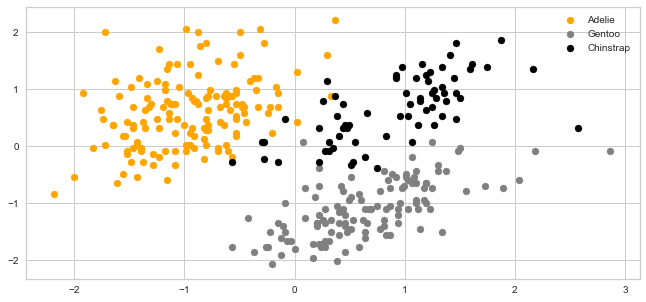

In [4]:
plt.figure(figsize=(11, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Gentoo')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='black', label='Chinstrap')

plt.legend();

### Python Implementation

In [5]:
class MyKMeansClustering():
    def __init__(self, k=2):
        self.k = k

    def fit(self, X, max_num_iterattions=300, sse_treshold = 0.001):

        self.centroids = {}
        
        # Initialize Centroids
        for i in range(self.k):
            self.centroids[i] = X[i]

        for i in range(max_num_iterattions):
            
            # Initialize Clusters
            self.clusters = {}
            for i in range(self.k):
                self.clusters[i] = []
            
            # Euclidian distance for each point
            for sample in X:
                distances = [np.linalg.norm(sample-self.centroids[centroid]) for centroid in self.centroids]
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(sample)

            # Update centroids
            previous_centroids = dict(self.centroids)
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)

            # Check if centroids changed
            centroids_changed = True
            
            for centroid in self.centroids:
                sse = np.sum((self.centroids[centroid] - previous_centroids[centroid])/
                             previous_centroids[centroid]*100.0)               
                if  sse > sse_treshold:
                    centroids_changed = False

            if centroids_changed:
                break

    def predict(self, sample):
        distances = [np.linalg.norm(sample - self.centroids[centroid]) for centroid in self.centroids]
        cluster = distances.index(min(distances))
        return cluster

In [6]:
model = MyKMeansClustering(k = 3)
model.fit(X, max_num_iterattions=700, sse_treshold= 0.00001)

clusters = []
for sample in X:
    clusters.append(model.predict(sample))
    
print(accuracy_score(clusters, y))


0.9281437125748503


In [7]:
pd.DataFrame({
    'Actual Value': y,
    'K-Means Clustering': clusters,
})

,Actual Value,K-Means Clustering
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
329,1,1
330,1,1
331,1,1
332,1,1


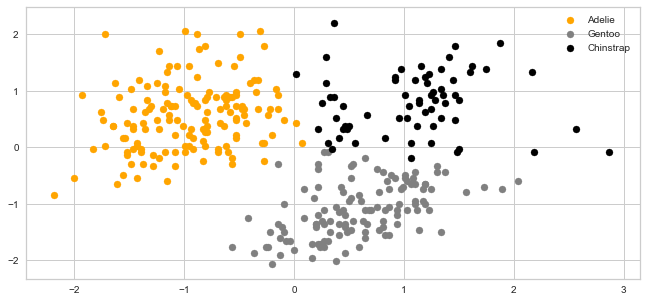

In [8]:
clusters = np.array(clusters)

plt.figure(figsize=(11, 5))
plt.scatter(X[clusters == 0][:, 0], X[clusters == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[clusters == 1][:, 0], X[clusters == 1][:, 1], color='gray', label='Gentoo')
plt.scatter(X[clusters == 2][:, 0], X[clusters == 2][:, 1], color='black', label='Chinstrap')

plt.legend();

### Using SciKit Learn

In [9]:
kmeans = KMeans(n_clusters=3, max_iter = 700, random_state=6)
kclusters = kmeans.fit_predict(X)
print(accuracy_score(kclusters, y))

0.9251497005988024


In [10]:
pd.DataFrame({
    'Actual Value': y,
    'K-Means Clustering': clusters,
    'SciKit K-Means Clustering': kclusters,
})

,Actual Value,K-Means Clustering,SciKit K-Means Clustering
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
329,1,1,1
330,1,1,1
331,1,1,1
332,1,1,1


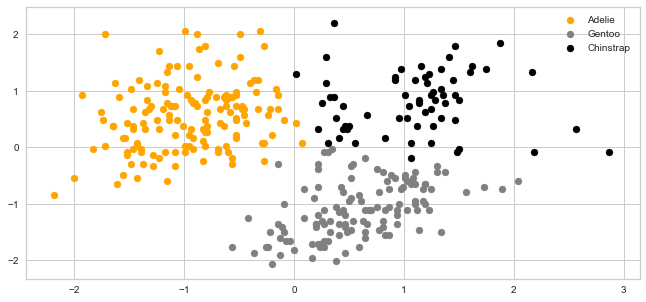

In [11]:
kclusters = np.array(kclusters)

plt.figure(figsize=(11, 5))
plt.scatter(X[kclusters == 0][:, 0], X[kclusters == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[kclusters == 1][:, 0], X[kclusters == 1][:, 1], color='gray', label='Gentoo')
plt.scatter(X[kclusters == 2][:, 0], X[kclusters == 2][:, 1], color='black', label='Chinstrap')

plt.legend();

### Picking the number of clusters

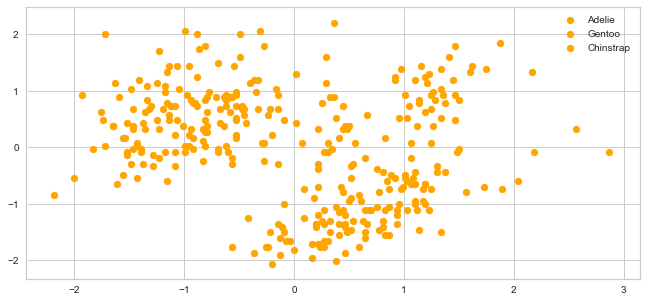

In [12]:
kclusters = np.array(kclusters)

plt.figure(figsize=(11, 5))
plt.scatter(X[kclusters == 0][:, 0], X[kclusters == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[kclusters == 1][:, 0], X[kclusters == 1][:, 1], color='orange', label='Gentoo')
plt.scatter(X[kclusters == 2][:, 0], X[kclusters == 2][:, 1], color='orange', label='Chinstrap')

plt.legend();

In [13]:
distortions = [] 
inertias = [] 
  
for k in range(1,10): 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

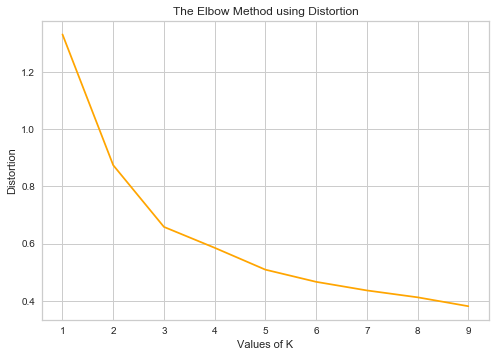

In [14]:
plt.plot(range(1, 10), distortions, color='orange') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

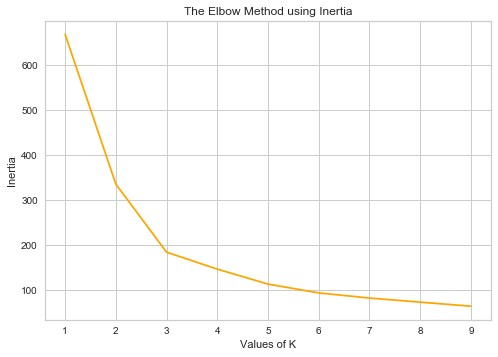

In [15]:
plt.plot(range(1, 10), inertias, color='orange') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

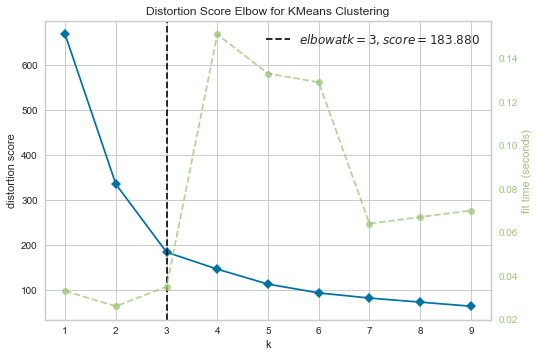

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()

## Agglomerative Clustering

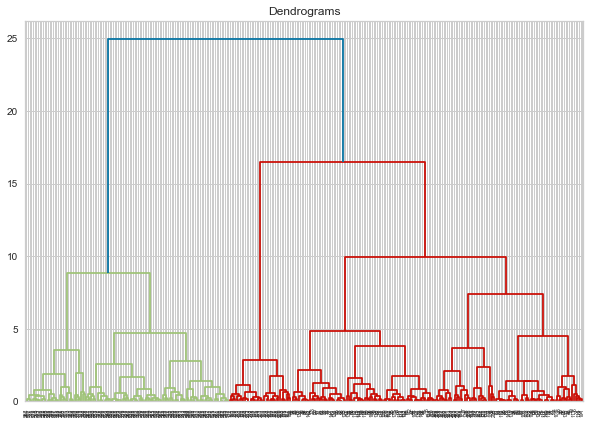

In [17]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

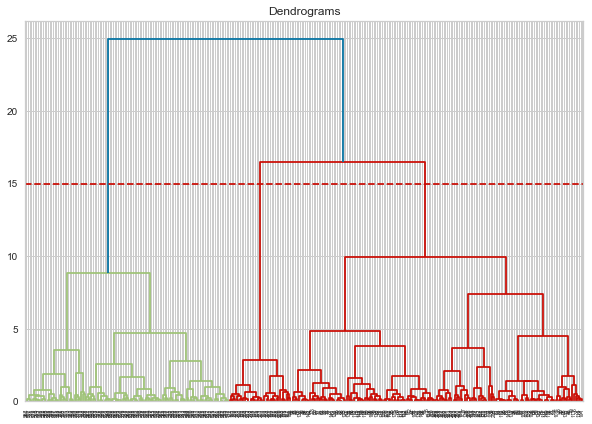

In [18]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

In [19]:
aglo = AgglomerativeClustering(n_clusters=3)
aclusters = aglo.fit_predict(X)
print(accuracy_score(aclusters, y))

0.9011976047904192


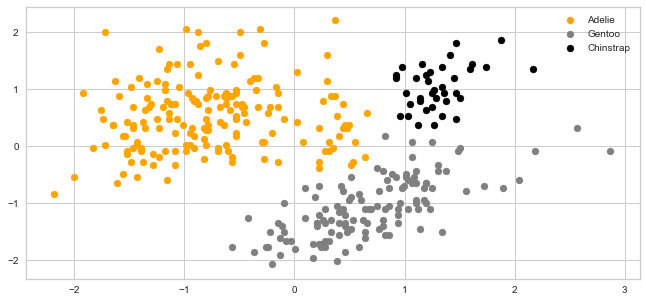

In [20]:
aclusters = np.array(aclusters)

plt.figure(figsize=(11, 5))
plt.scatter(X[aclusters == 0][:, 0], X[aclusters == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[aclusters == 1][:, 0], X[aclusters == 1][:, 1], color='gray', label='Gentoo')
plt.scatter(X[aclusters == 2][:, 0], X[aclusters == 2][:, 1], color='black', label='Chinstrap')

plt.legend();

## DBSCAN

In [21]:
dbscan = DBSCAN(eps = 0.89, min_samples=74)
dbclusters = dbscan.fit_predict(X)
print(accuracy_score(dbclusters, y))

0.7694610778443114


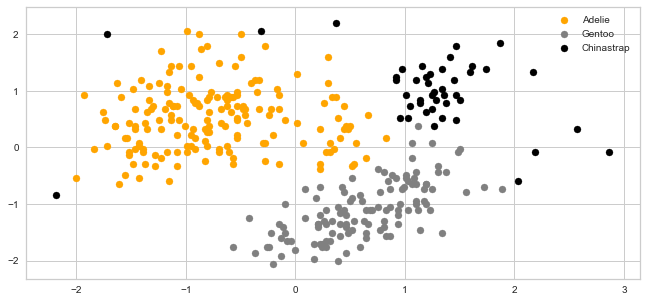

In [22]:
dbclusters = np.array(dbclusters)

plt.figure(figsize=(11, 5))

plt.scatter(X[dbclusters == 0][:, 0], X[dbclusters == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[dbclusters == 1][:, 0], X[dbclusters == 1][:, 1], color='gray', label='Gentoo')
plt.scatter(X[dbclusters == -1][:, 0], X[dbclusters == -1][:, 1], color='black', label='Chinastrap')

plt.legend();